In [1]:
#!/usr/bin/python2.7

# HSMC modelling

## Configuration
### It is assumed that this notebook is run from singularity, mounting the directory containing tutorials as /scratch

In [2]:
from seqint import Model
import numpy as np
from openalea.sequence_analysis import Estimate
from openalea.sequence_analysis import Plot
import os
import pandas as pd
# import random
import matplotlib.pyplot as plt

##### Check pandas version

In [3]:
# print pd.__version__

In [4]:
import xlrd
xlrd.__version__

'1.2.0'

##### Enabling R extensions

In [5]:
%load_ext rpy2.ipython

#####  Place variables in markdown outputs

In [6]:
from IPython.display import Markdown
from IPython.core.magic import register_cell_magic


@register_cell_magic
def markdown(line, cell):
    return Markdown(cell.format(**globals()))

## Determining if images have to be saved (not used for the moment)

## Loading and preparing data

In [7]:
import sys

In [8]:
sys.path.append("/scratch")

In [9]:
import numpy as np

from Utils import *
from Code.amlseq2R import *

In [10]:
print(os.getcwd())

/scratch


In [11]:
home_dir = "/scratch"
base_path = home_dir
ressource_path = base_path
os.chdir(base_path)

In [12]:
os.listdir(ressource_path + os.sep )

['seq1v_5s_LR_init.hsmc',
 'tmp_dir',
 'sim_v_5s_LR.hsmc',
 'Code',
 'Results',
 'Utils',
 'sequences.ipynb',
 '.ipynb_checkpoints']

**Read an existing HSMC model**

In [13]:
from openalea.sequence_analysis import HiddenSemiMarkov

model_file = "sim_v_5s_LR.hsmc"
#model_file = "init_v_5s_LR.hsmc"
hmsc = HiddenSemiMarkov(ressource_path + os.sep + model_file)

**Simulate sequences**

In [14]:
from openalea.sequence_analysis import Simulate

In [15]:
nb_seq = 10
seq_length = 100
seq = hmsc.simulation_nb_sequences(nb_seq, seq_length, True)

In [16]:
# Print first simulated sequence.
# First variable is the simulated state
print(seq[0])

[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [1, 1, 0, 1], [1, 0, 0, 1], [1, 1, 0, 0], [1, 4, 0, 0], [1, 2, 3, 1], [1, 2, 0, 0], [1, 2, 0, 1], [1, 1, 0, 0], [1, 1, 0, 1], [1, 1, 0, 1], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 1], [1, 0, 0, 1], [1, 1, 0, 1], [1, 1, 0, 0], [1, 3, 0, 0], [1, 1, 0, 1], [1, 2, 0, 0], [1, 1, 0, 0], [1, 0, 0, 1], [2, 0, 0, 0], [2, 1, 0, 0], [2, 1, 0, 0], [2, 1, 0, 0], [2, 1, 0, 0], [2, 1, 0, 0], [2, 1, 0, 0], [2, 2, 0, 0], [2, 1, 0, 0], [2, 1, 0, 0], [2, 1, 0, 0], [2, 1, 0, 0], [2, 1, 0, 0], [2, 0, 0, 0], [2, 0, 0, 0], [2, 0, 0, 0], [2, 3, 0, 0], [2, 1, 0, 0], [2, 1, 0, 0], [2, 0, 0, 0], [2, 1, 0, 0], [2, 0, 0, 0], [2, 1, 0, 0], [2, 1, 0, 0], [2, 0, 0, 0], [2, 0, 0, 0], [2, 1, 0, 0], [2, 1, 0, 0], [2, 1, 0, 0], [2, 1, 0, 0], [2, 1, 0, 0], [2, 1, 0, 1], [2, 1, 0, 0], [2, 1, 0, 0], [2, 0, 0, 0], [2, 1, 0, 0], [2, 1, 0, 0], [2, 0, 0, 0], [2, 0, 0, 0], [2, 1, 0, 0], [2, 0

**Perform operations on sequences**

In [17]:
# Discard variable 1 (state)
obs = seq.select_variable([1], keep=False)

## Plotting marginal probabilities of data

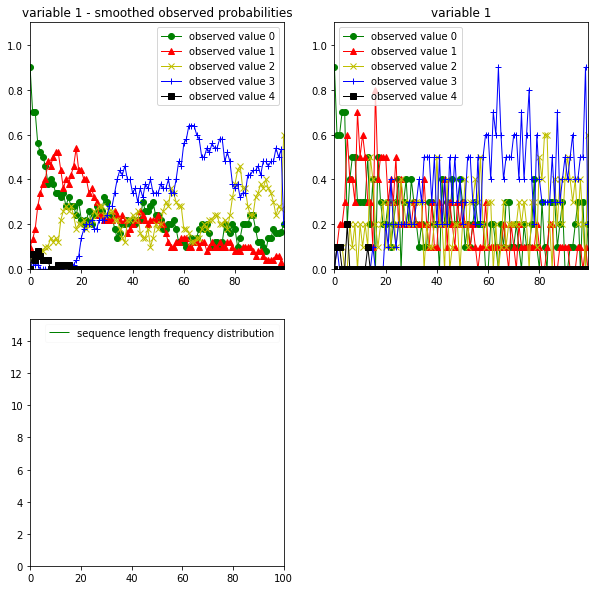

In [18]:
# Variable 1: lateral shoot type
obs.plot("Intensity", 0)
plt.show()

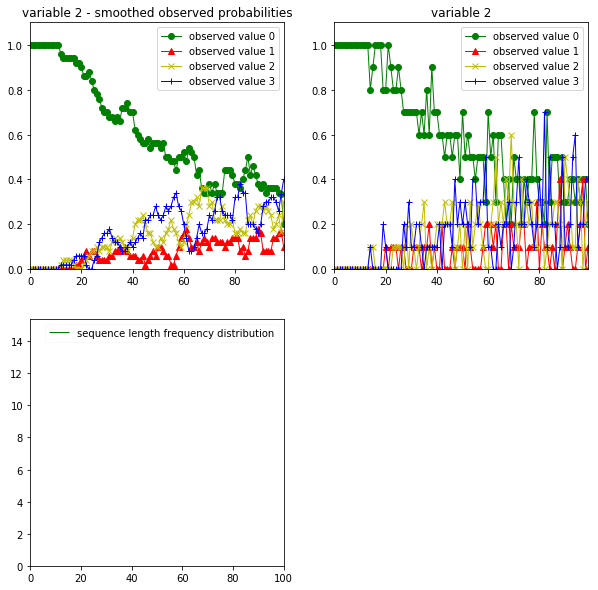

In [19]:
# Variable 2: lateral flowering
obs.plot("Intensity", 1)
plt.show()

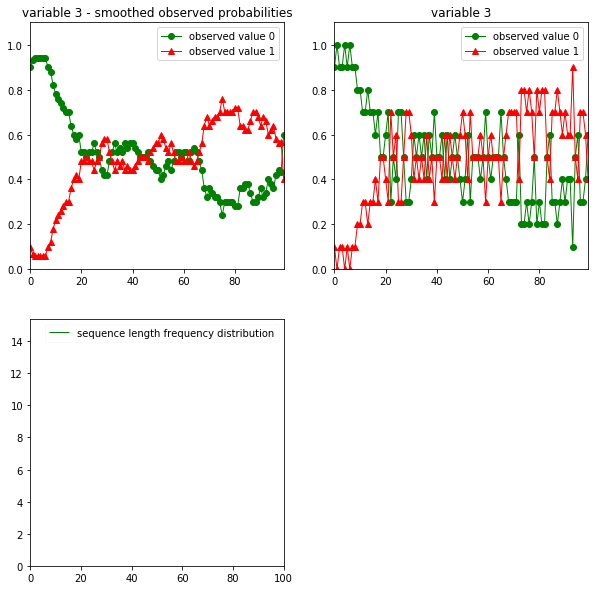

In [20]:
# Variable 3: terminal flowering
obs.plot("Intensity", 2)
plt.show()

## HSCM re-estimation

In [21]:
# Discard state variable
seq1v = seq.select_variable([2, 3, 4], True)

In [22]:
nb_states = 5
init_file = base_path + os.sep + "seq1v_" + str(nb_states) + "s_LR_init.hsmc"

In [23]:
from openalea.sequence_analysis import Estimate
from openalea.sequence_analysis import HiddenSemiMarkov

In [24]:
# Conversion dos2unix file if needed
try:
    hmsc_init = HiddenSemiMarkov(init_file)
except:
     dos2unix(init_file, init_file)
hmsc_init = HiddenSemiMarkov(init_file)


### Estimate HSCM with default initialization


Left-right model

In [25]:
hsmc1 = Estimate(seq1v, "HIDDEN_SEMI-MARKOV", "Ordinary", nb_states, "LeftRight", Nbiteration=300)   
print(hsmc1)

HIDDEN_SEMI-MARKOV_CHAIN

5 STATES

INITIAL_PROBABILITIES
0.900252   0.0997281  1e-05      1e-05      0          

TRANSITION_PROBABILITIES
0          0.33353    1e-05      0.66645    1e-05      
0          0          0.246779   0.500003   0.253218   
0          0          0          1e-05      0.99999    
0          0          0          0          1          
0          0          0          0          1          

transient class: state 0
transient class: state 1
transient class: state 2
transient class: state 3
recurrent class: state 4 (absorbing state)

probability of no-occurrence of state 0: 0.0997481

time up to the first occurrence of state 0 distribution
mean: 0   variance: 0   standard deviation: 0

time up to the first occurrence of state 0 frequency distribution - sample size: 9
mean: 0   variance: 0   standard deviation: 0

probability of no-occurrence of state 1: 0.600004

time up to the first occurrence of state 1 distribution
mean: 21.185   variance: 414.804   standard

Irreducible model

### Plot model and data characteristics.    
Syntax: hsmc1.extract(int type, int variable, int value)    
types correspond to SELF_TRANSITION , OBSERVATION , INTENSITY , FIRST_OCCURRENCE , RECURRENCE_TIME , SOJOURN_TIME ,   INITIAL_RUN , FINAL_RUN , NB_RUN , NB_OCCURRENCE ,  COUNTING , LENGTH , SEQUENCE_CUMUL , SEQUENCE_MEAN

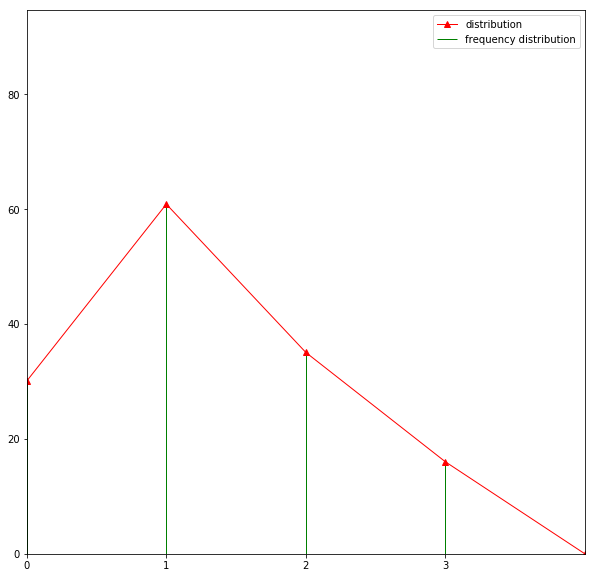

In [26]:
# Type 1: emission distribution,  Variable 1: lateral shoot type, State 4
hsmc1.extract(1, 1, 4).plot()
plt.show()

In [27]:
# hsmc1.extract(2, 1, 4).plot()

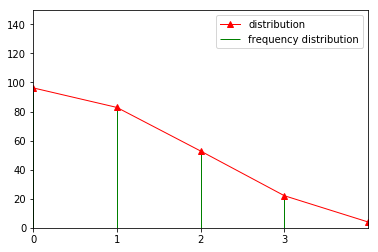

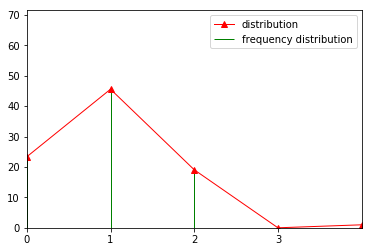

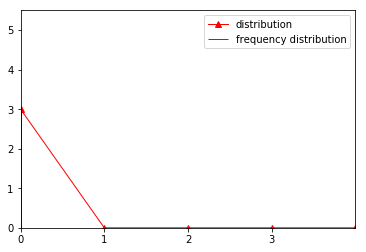

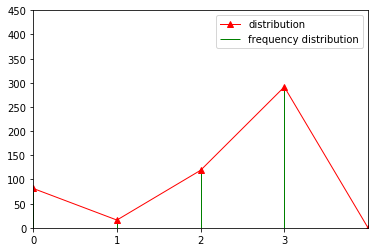

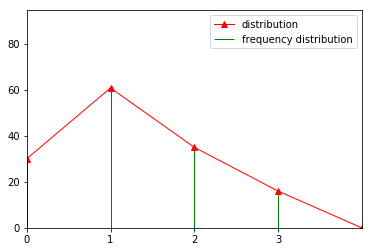

In [28]:
# All emission distributions for variable 1
plt.figure(1)
for i in range(5):
    plt.subplot(3,3, i+1)
    hsmc1.extract(1, 1, i).plot()


### TODO: states 3 and 4 are swapped?

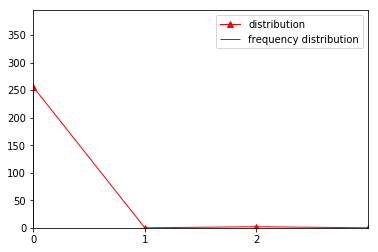

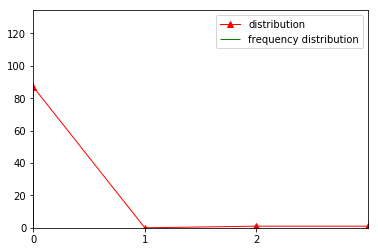

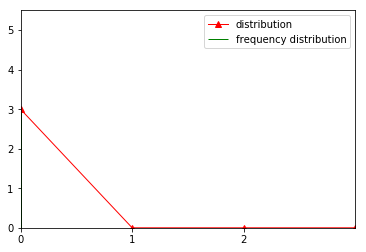

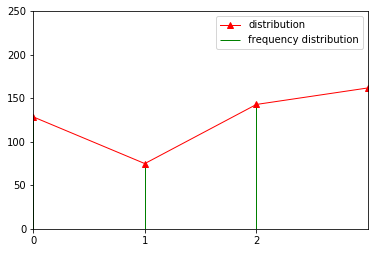

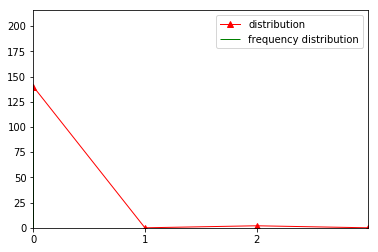

In [29]:
# All emission distributions for variable 2
plt.figure(1)
for i in range(5):
    plt.subplot(3,3, i+1)
    hsmc1.extract(1, 2, i).plot()

In [30]:
print(Estimate(seq1v, "HIDDEN_SEMI-MARKOV", "Ordinary", nb_states, "Irreducible", Nbiteration=300))  


HIDDEN_SEMI-MARKOV_CHAIN

5 STATES

INITIAL_PROBABILITIES
1e-05     0.099997  1e-05     1e-05     0.899973  

TRANSITION_PROBABILITIES
0         1e-05     1e-05     0.330827  0.669153  
1e-05     0         1e-05     0.99997   1e-05     
1e-05     1e-05     0         0.99997   1e-05     
1e-05     1e-05     0.99997   0         1e-05     
0.334078  1e-05     1e-05     0.665902  0         

recurrent class: states 0 1 2 3 4

time up to the first occurrence of state 0 distribution
mean: 42.6452   variance: 1548.84   standard deviation: 39.3553

time up to the first occurrence of state 0 frequency distribution - sample size: 3
mean: 9.33333   variance: 4.33333   standard deviation: 2.08167

time up to the first occurrence of state 1 distribution
mean: 1.04302   variance: 694.887   standard deviation: 26.3607

time up to the first occurrence of state 1 frequency distribution - sample size: 1
mean: 0   variance: 0   standard deviation: 0

time up to the first occurrence of state 2 distributio

Discard state sequence computations (entropy, Viterbi?)

In [31]:
print(Estimate(seq1v, "HIDDEN_SEMI-MARKOV", "Ordinary", nb_states, "Irreducible", Nbiteration=300, StateSequence=False))

HIDDEN_SEMI-MARKOV_CHAIN

5 STATES

INITIAL_PROBABILITIES
1e-05     0.099997  1e-05     1e-05     0.899973  

TRANSITION_PROBABILITIES
0         1e-05     1e-05     0.330827  0.669153  
1e-05     0         1e-05     0.99997   1e-05     
1e-05     1e-05     0         0.99997   1e-05     
1e-05     1e-05     0.99997   0         1e-05     
0.334078  1e-05     1e-05     0.665902  0         

recurrent class: states 0 1 2 3 4

time up to the first occurrence of state 0 distribution
mean: 42.6452   variance: 1548.84   standard deviation: 39.3553

time up to the first occurrence of state 1 distribution
mean: 1.04302   variance: 694.887   standard deviation: 26.3607

time up to the first occurrence of state 2 distribution
mean: 133.99   variance: 4450.56   standard deviation: 66.7125

time up to the first occurrence of state 3 distribution
mean: 59.2976   variance: 2783.15   standard deviation: 52.7556

time up to the first occurrence of state 4 distribution
mean: 0.0216902   variance: 14.3768

Using the MCEM option would cause the library to crash

Using the Equilibrium option (stationary) would cause the library to crash

Change option in means of initial occupancy distributions

In [32]:
print(Estimate(seq1v, "HIDDEN_SEMI-MARKOV", "Ordinary", nb_states, "Irreducible", Nbiteration=300, InitialOccupancyMean=20))

HIDDEN_SEMI-MARKOV_CHAIN

5 STATES

INITIAL_PROBABILITIES
0.100018     1e-05        1e-05        1e-05        0.899952     

TRANSITION_PROBABILITIES
0            0.755682     1e-05        1e-05        0.244298     
1e-05        0            1e-05        0.661586     0.338394     
1e-05        1e-05        0            0.99997      1e-05        
1e-05        0.181216     0.818764     0            1e-05        
0.272698     0.000102883  0.72719      1e-05        0            

recurrent class: states 0 1 2 3 4

time up to the first occurrence of state 0 distribution
mean: 97.075   variance: 47986.2   standard deviation: 219.058

time up to the first occurrence of state 0 frequency distribution - sample size: 4
mean: 6.75   variance: 24.9167   standard deviation: 4.99166

time up to the first occurrence of state 1 distribution
mean: 309.161   variance: 81065   standard deviation: 284.719

time up to the first occurrence of state 1 frequency distribution - sample size: 3
mean: 27.6667   v

Change option in estimating occupancy distributions (censoring, etc.?)

In [33]:
print(Estimate(seq1v, "HIDDEN_SEMI-MARKOV", "Ordinary", nb_states, "Irreducible", Nbiteration=300, Estimator="KaplanMeier"))

HIDDEN_SEMI-MARKOV_CHAIN

5 STATES

INITIAL_PROBABILITIES
1e-05      0.0999969  1e-05      1e-05      0.899973   

TRANSITION_PROBABILITIES
0          1e-05      1e-05      0.335476   0.664504   
0.0097071  0          0.990273   1e-05      1e-05      
1e-05      1e-05      0          0.99997    1e-05      
1e-05      1e-05      0.99997    0          1e-05      
0.272723   1e-05      0.727257   1e-05      0          

recurrent class: states 0 1 2 3 4

time up to the first occurrence of state 0 distribution
mean: 19.1578   variance: 331.552   standard deviation: 18.2086

time up to the first occurrence of state 0 frequency distribution - sample size: 3
mean: 9.33333   variance: 4.33333   standard deviation: 2.08167

time up to the first occurrence of state 1 distribution
mean: 0.742908   variance: 493.711   standard deviation: 22.2196

time up to the first occurrence of state 1 frequency distribution - sample size: 1
mean: 0   variance: 0   standard deviation: 0

time up to the first oc

Change option in state sequence restoration (Viterbi vs. smoothing)

In [34]:
print(Estimate(seq1v, "HIDDEN_SEMI-MARKOV", "Ordinary", nb_states, "Irreducible", Nbiteration=300, StateSequences="ForwardBackward"))

HIDDEN_SEMI-MARKOV_CHAIN

5 STATES

INITIAL_PROBABILITIES
1e-05     0.099997  1e-05     1e-05     0.899973  

TRANSITION_PROBABILITIES
0         1e-05     1e-05     0.330827  0.669153  
1e-05     0         1e-05     0.99997   1e-05     
1e-05     1e-05     0         0.99997   1e-05     
1e-05     1e-05     0.99997   0         1e-05     
0.334078  1e-05     1e-05     0.665902  0         

recurrent class: states 0 1 2 3 4

time up to the first occurrence of state 0 distribution
mean: 42.6452   variance: 1548.84   standard deviation: 39.3553

time up to the first occurrence of state 0 frequency distribution - sample size: 3
mean: 9.33333   variance: 4.33333   standard deviation: 2.08167

time up to the first occurrence of state 1 distribution
mean: 1.04302   variance: 694.887   standard deviation: 26.3607

time up to the first occurrence of state 1 frequency distribution - sample size: 1
mean: 0   variance: 0   standard deviation: 0

time up to the first occurrence of state 2 distributio

Change option in estimating occupancy distributions

In [35]:
print(Estimate(seq1v, "HIDDEN_SEMI-MARKOV", "Ordinary", nb_states, "Irreducible", Nbiteration=300, OccupancyMean="Estimated"))

HIDDEN_SEMI-MARKOV_CHAIN

5 STATES

INITIAL_PROBABILITIES
1e-05     0.099997  1e-05     1e-05     0.899973  

TRANSITION_PROBABILITIES
0         1e-05     1e-05     0.330827  0.669153  
1e-05     0         1e-05     0.99997   1e-05     
1e-05     1e-05     0         0.99997   1e-05     
1e-05     1e-05     0.99997   0         1e-05     
0.334078  1e-05     1e-05     0.665902  0         

recurrent class: states 0 1 2 3 4

time up to the first occurrence of state 0 distribution
mean: 42.6452   variance: 1548.84   standard deviation: 39.3553

time up to the first occurrence of state 0 frequency distribution - sample size: 3
mean: 9.33333   variance: 4.33333   standard deviation: 2.08167

time up to the first occurrence of state 1 distribution
mean: 1.04302   variance: 694.887   standard deviation: 26.3607

time up to the first occurrence of state 1 frequency distribution - sample size: 1
mean: 0   variance: 0   standard deviation: 0

time up to the first occurrence of state 2 distributio

Other options in estimate

In [36]:
help(Estimate)

Help on function Estimate in module openalea.sequence_analysis.estimate:

Estimate(obj, *args, **kargs)
    Estimate
    
    * Estimation of distributions.
    * Estimation of 'top' parameters.
    * Estimation of a renewal process from count data.
    * Estimation of (hidden) Markovian models.
    
    :Usage:
    .. doctest::
        :options: +SKIP
    
        >>> Estimate(histo, "NON-PARAMETRIC")
        >>> Estimate(histo, "NB", MinInfBound=1, InfBoundStatus="Fixed")
        >>> Estimate(histo, "MIXTURE", "B", dist,..., MinInfBound=1,
            InfBoundStatus="Fixed", DistInfBoundStatus="Fixed")
        >>> Estimate(histo, "MIXTURE", "B", "NB",..., MinInfBound=1,
                InfBoundStatus="Fixed", DistInfBoundStatus="Fixed",
                NbComponent="Estimated", Penalty="AIC")
        >>> Estimate(histo, "CONVOLUTION", dist,MinInfBound=1, Parametric=False)
        >>> Estimate(histo, "CONVOLUTION", dist,InitialDistribution=initial_dist,
                Parametric=False

### Estimate HSCM with manual initialization from file

In [37]:
hsmc1 = Estimate(seq1v, "HIDDEN_SEMI-MARKOV", hmsc_init, NbIteration=300)
print(hsmc1)

HIDDEN_SEMI-MARKOV_CHAIN

5 STATES

INITIAL_PROBABILITIES
0.694432   0.0999981  0.20555    1e-05      1e-05      

TRANSITION_PROBABILITIES
0          0.431991   0.567989   1e-05      1e-05      
0          0          0.499998   1e-05      0.499992   
0          0          0          0.99999    1e-05      
0          0          0          0          1          
0          0          0          0          1          

transient class: state 0
transient class: state 1
transient class: state 2
transient class: state 3
recurrent class: state 4 (absorbing state)

probability of no-occurrence of state 0: 0.305568

time up to the first occurrence of state 0 distribution
mean: 0   variance: 0   standard deviation: 0

time up to the first occurrence of state 0 frequency distribution - sample size: 7
mean: 0   variance: 0   standard deviation: 0

probability of no-occurrence of state 1: 0.600011

time up to the first occurrence of state 1 distribution
mean: 5.37165   variance: 18.8147   standard

### Export states


In [38]:
from openalea.sequence_analysis import ExtractData
seg = ExtractData(hsmc1) # Data and segmentation

In [39]:
# Restored states are added as the first variable to seq_1v, see
print(seg[0][0:10])
print(seq1v[0][0:10])

[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]
[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]]


In [40]:
seg_dir = "Results"

In [41]:
if not os.path.exists(seg_dir): 
    # if the seg_dir directory is not present  
    # then create it. 
    os.makedirs(seg_dir) 

In [42]:
# Export into file

seg_file = "seq1v_" + str(nb_states) + "s_LR_segm.seq"
output_Rpyseq1_file = seg_dir + os.sep + seg_file[0:-4] + ".csv"
WriteRSequence(seg, output_Rpyseq1_file, RestoredStatesHeader())

Create DataFrame

In [43]:
df = pd.read_csv(output_Rpyseq1_file, index_col=0, comment="#", usecols=range(6))
var_names = [' axillary shoot type',' lateral flowering', ' terminal flowering']
df = df[var_names]

In [44]:
# Add sequence identifiers to DF
seqid = []
for i in range(len(seq1v)):
    seqid += [i+1] * len(seq1v[i])
seqid
df["seqid"] = seqid

In [45]:
from seqint.pyseq_data_frame import PySeqDataFrame
pyd = PySeqDataFrame(df, seq_index_name="seqid")
pyd.seq_index_name
pyd.col_to_seq(var_names)
seqc = pyd.get_input_sequence(var_names)

In [46]:
assert(str(seqc[0]) == str(seq1v[0]))

### Embed HSCM within Model class for automatic parameter visualization


In [47]:
output_path = base_path + os.sep + "Results" 
model = Model(pyd, output_process_name=var_names, init_hsmc_file=init_file, output_path=output_path)
model.iterate_em(300)
model.hsmm.save(os.path.join(output_path, 'seq1v_' + str(nb_states) + 's_LR.hsmc'))
model.print_hsmc_file(verbose=False)

/scratch/Results/2AmEGv.hsmc
HIDDEN_SEMI-MARKOV_CHAIN

5 STATES

INITIAL_PROBABILITIES

0.694432     0.099998     0.20555     1e-05     9.99999999995e-06

TRANSITION_PROBABILITIES

0.0     0.431991     0.567989     1e-05     1.00000000001e-05

0.0     0.0     0.499998     1e-05     0.499992

0.0     0.0     0.0     0.99999     9.99999999995e-06

0.0     0.0     0.0     0.0     1.0

0.0     0.0     0.0     0.0     1.0

STATE 0 OCCUPANCY_DISTRIBUTION

NEGATIVE_BINOMIAL   INF_BOUND : 2   PARAMETER : 3.48885   PROBABILITY : 0.400848

STATE 1 OCCUPANCY_DISTRIBUTION

NEGATIVE_BINOMIAL   INF_BOUND : 17   PARAMETER : 2.15715   PROBABILITY : 0.229641

STATE 2 OCCUPANCY_DISTRIBUTION

NEGATIVE_BINOMIAL   INF_BOUND : 10   PARAMETER : 0.765176   PROBABILITY : 0.0701318

STATE 3 OCCUPANCY_DISTRIBUTION

NEGATIVE_BINOMIAL   INF_BOUND : 1   PARAMETER : 1.22179   PROBABILITY : 0.0420701

3 OUTPUT_PROCESSES

OUTPUT_PROCESS 1 : CATEGORICAL

STATE 0 OBSERVATION_DISTRIBUTION

OUTPUT 0 : 0.8963

OUTPUT 1 : 0

In [48]:
from seqint import html_report

output_path = "." + os.sep + "tmp_dir"

if not os.path.exists(output_path):
    os.mkdir(output_path)
    
report = html_report.Htmlreport(model, output_path=output_path)
report.make_html(True)

*Removing some garbage files*

In [49]:
report_prefix = report._html_report_file_path[0:-11]
report_prefix = report_prefix.split("/")[2]
import glob
for f in glob.glob("." +os.sep +  "*.dat"):
    os.remove(f)

In [50]:
print("Report printed in " + str(report._html_report_file_path))

Report printed in ./tmp_dir/2AmEGv-report.html


In [51]:
import shutil
#shutil.rmtree(tempdir)

In [52]:
import dill
# dill.dump_session('notebook_env.db')